<a href="https://colab.research.google.com/github/tayyib-saddique/advent-of-code-2024/blob/main/week4/non_binary_classification_MNIST784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Non-binary Classification: the MNIST784 dataset

A simple notebook for testing a classifier against the MNIST 784 dataset.

A solution is also available from the Scikit-learn web site.

In [ ]:
import time
import numpy as np


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


Import this benchmark dataset direct from the `openml` repository.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target

For smaller images we can use the internal `digits` dataset.


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

In [ ]:
X, y = mnist['data'], mnist['target']

X.shape

(70000, 784)

#### Example images

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
type(X)

pandas.core.frame.DataFrame

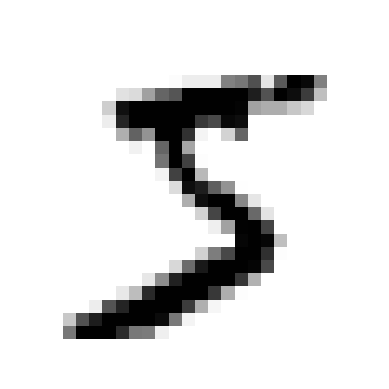

In [ ]:
some_digit = X.iloc[0]

# Convert the Pandas Series to a NumPy array before reshaping
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

plt.show()

#### Split the data-set

* Prepare the dataset by dividing it into train and test set.
  
* First 6000 is used as training and the rest as test.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Classification

* Scale $X$ to have zero mean and unit variance [required by regressor]
* Fit the model.
* Find the score.

In [ ]:
t0 = time.time()

#scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)

# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100

# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0

print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Example run in 12.024 s
Sparsity with L2 penalty: 8.55%
Test score with L2 penalty: 0.9003


#### Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#get prediction from the classifier
y_pred=clf.predict(X_test)

#print classification report
print (classification_report(
        y_test,
        y_pred
    ))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.93      0.97      0.95      1135
           2       0.92      0.86      0.89      1032
           3       0.88      0.89      0.89      1010
           4       0.88      0.93      0.91       982
           5       0.87      0.83      0.85       892
           6       0.92      0.93      0.93       958
           7       0.89      0.90      0.90      1028
           8       0.88      0.83      0.85       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



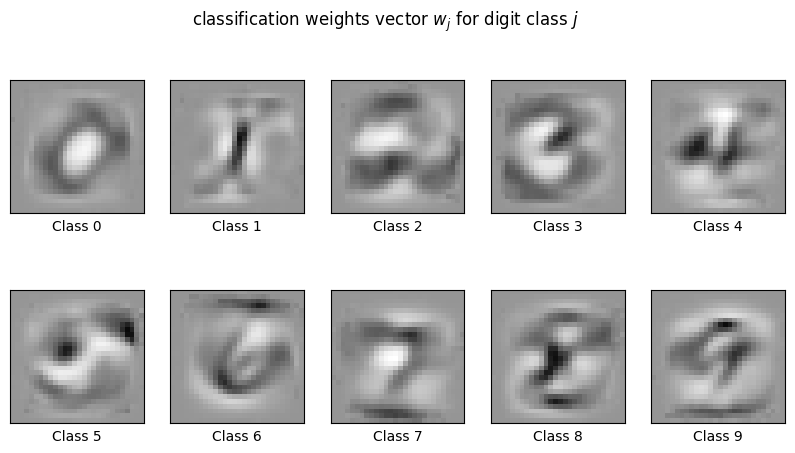

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()

plt.figure(figsize=(10, 5))

scale = np.abs(coef).max()

for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()